In [219]:
%matplotlib inline
import numpy as np
from scipy import constants
from scipy import interpolate
from time import time

from matplotlib import colors
import matplotlib.lines as mlines 
import matplotlib.pyplot as plt

import limits

height = 3.15 
width = height/0.8 #height*constants.golden

fig_size = [width,height]
# Latex params
rc_params = {'backend': 'ps',
          'axes.labelsize': 14,
          'font.size': 10,
          'legend.fontsize': 12,
          'xtick.labelsize': 12,
          'ytick.labelsize': 12,
          'axes.linewidth':0.5,
          'text.usetex': True,
          'font.family': 'serif',
          'font.serif': ['Computer Modern Roman'],
          'xtick.major.pad': 8,
          'ytick.major.pad': 8,
         'figure.figsize':fig_size}

def _safe_log(x):
    if x<= 0.:
        return 200.
    else:
        return np.log(x)

safe_log = np.vectorize(_safe_log)

def log_griddata(xy, z, xi, yi):
    loggrid = interpolate.griddata(np.log(xy),safe_log(z), (np.log(xi), np.log(yi)), method='linear')
    return np.exp(loggrid)

# Colors
ldmx_color = '#9966ff'
ldmx_inv_color = '#00994d'
ccd_color = '#730099'
supercdms_color = '#007399'
babar_color = '#0072bd'
orsay_color = '#a37bcc'
e137_color = '#a37bcc'
lsnd_color = '#7BCCC4'
hps_color = '#bd8e00'
bdx_color = '#cc7b7b'
abun_color = 'black'#'#d95319'
seaquest_color = '#bd00bd'
flat_grey = "#cccccc" #"#e6e6e6"
si_color = '#404040'
cmb_color = '#999999'
excluded_label_color = '#404040'

#from gammav_func import *

def make_plots(params):
    
    aD = params['aD']
    rPi = params['rPi']
    mPiOverFpi = params['mPiOverFpi']   
    scan_fname = params['scan_fname']
    
    cmb_decay_bound_file = params['cmb_decay_bound_file']
    abun_contour_file1 = params['abundance_file1']
    abun_contour_file2 = params['abundance_file2']
    
    label_list = params['label_list']
    fout = params['fout']
    print("LOOOOOOOOOOOOOOOK: ", params['fout'])
    plot_title = params['title']
    
    babar_bound_fname = params['babar_bound_fname']
    
    scan_file = np.loadtxt(scan_fname)
    #scan_file = scan_file[0:2]
    #print(scan_file)
    
    babar_bound = np.loadtxt(babar_bound_fname) 
    
    cmb_decay_bound = np.loadtxt(cmb_decay_bound_file)
    
    abun_cont_mPi1 = np.loadtxt(abun_contour_file1)
    abun_cont_mAp1 = np.array([[3*x[0],x[1]] for x in abun_cont_mPi1]) #Why multiply by 3??
    abun_cont_mPi2 = np.loadtxt(abun_contour_file2)
    abun_cont_mAp2 = np.array([[3*x[0],x[1]] for x in abun_cont_mPi2]) #Why multiply by 3??
    
    br_babar = 1.
    
     # This branching includes pipi
    br_to_inv_dat = scan_file[scan_file[:,1]==1e-4][:,(0,9)] #For all rows, if first column==1e-4, take that row, then grab 0 and 9 index
    #print(scan_file[scan_file[:,1]==1e-4])[:,1]
    #print(br_to_inv_dat)
    br_to_inv_interp = interpolate.interp1d(br_to_inv_dat[:,0],br_to_inv_dat[:,1],kind='linear',bounds_error=False,fill_value=(0.43543947,0.22289155))
   
    mAps = np.linspace(scan_file[:,0].min(),scan_file[:,0].max(), 100)
    
    plt.loglog(abun_cont_mAp1[:,0], abun_cont_mAp1[:,1])
    plt.loglog(abun_cont_mAp2[:,0], abun_cont_mAp2[:,1],'--')
    plt.title('Abundance Lines')

    plt.show()
    
    #plt.xscale('log')
    
    mAps = np.linspace(0.01,8., 100)
    plt.loglog(babar_bound[:,0],babar_bound[:,1])
    plt.title('BaBar inv.')
    plt.show()
    
    # self-interactions
    mAps = np.logspace(np.log10(scan_file[:,0].min()),np.log10(scan_file[:,0].max()), 100)
    epss = np.logspace(np.log10(scan_file[:,1].min()), np.log10(scan_file[:,1].max()), 100)

    xi, yi = mAps, epss
    xi, yi = np.meshgrid(xi, yi)
 
    plt.xscale('log')
    plt.yscale('log')
    si = log_griddata(scan_file[:,(0,1)],scan_file[:,10], xi, yi) #interpolate.griddata(scan_file[:,(0,1)],scan_file[:,10], (xi, yi), method='linear')
    csi_low = plt.contour(xi,yi,si,levels=[1],linewidths=[1.5],linestyles='dashed');
    csi_high = plt.contour(xi,yi,si,levels=[5],linewidths=[1.5],linestyles='dashed');
    csi_low = csi_low.collections[0].get_paths()[0].vertices
    csi_high = csi_high.collections[0].get_paths()[0].vertices
    
    plt.plot(cmb_decay_bound[:,0],cmb_decay_bound[:,1])
    plt.title("Self-Interactions and CMB")
    plt.show()
    
    # E137

    plt.xscale('log')
    plt.yscale('log')

    plt.title("E137 and Orsay")

    mAps_e137 = np.logspace(-2.,np.log10(5.),100)
    epss_e137  = np.logspace(-6,-2,100)
    xi_e137, yi_e137 = mAps_e137, epss_e137
    xi_e137, yi_e137 = np.meshgrid(xi_e137, yi_e137)
    e137vis = log_griddata(scan_file[:,(0,1)],scan_file[:,7], xi_e137, yi_e137)
    cs3 = plt.contour(xi_e137, yi_e137,e137vis,levels=[10.],linewidths=[1.5])
    
    e137_cont = cs3.collections[0].get_paths()[0].vertices
    
    # Orsay

    plt.xscale('log')
    plt.yscale('log')

    mAps_orsay = np.logspace(-2.,0.,100)
    epss_orsay  = np.logspace(-6.,-2,100)
    xi_orsay, yi_orsay = mAps_orsay, epss_orsay
    xi_orsay, yi_orsay = np.meshgrid(xi_orsay, yi_orsay)
    orsayvis = interpolate.griddata(scan_file[:,(0,1)],scan_file[:,8], (xi_orsay, yi_orsay), method='cubic')
    cs4 = plt.contour(xi_orsay, yi_orsay,orsayvis,levels=[3.],linewidths=[1.5])

    orsay_cont = cs4.collections[0].get_paths()[0].vertices
    plt.show()
    
    # MAKE FINAL PLOT =================================================================
    
    mAps = np.logspace(-2,1,100)
    mPis = mAps*rPi

    plt.rcParams.update(rc_params)

    if params['ylim']:
        plt.ylim(params['ylim'])
    else:
        plt.ylim([1e-7,1e-2])
    
    plt.xlim([0.03,10.])
    plt.xlim([0.03,2.])
    plt.xscale('log')
    plt.yscale('log')
    
    # BaBar
    
    plt.fill_between(babar_bound[:,0],babar_bound[:,1],np.ones_like(babar_bound[:,0])*1e-1,facecolor=flat_grey,alpha=1,edgecolor='none')
    
    mAps_hps = np.logspace(-2.,1.,200)
    if params['ylim']:
        epss_hps = np.logspace(-4.,np.log10(params['ylim'][1]),200)
    else:
        epss_hps = np.logspace(-4.,-2.,200)
    xi_hps, yi_hps = mAps_hps, epss_hps
    xi_hps, yi_hps = np.meshgrid(xi_hps, yi_hps)
    
    hpsr2 = interpolate.griddata(scan_file[:,(0,1)],scan_file[:,3], (xi_hps, yi_hps), method='cubic')
    hpsf3 = interpolate.griddata(scan_file[:,(0,1)],scan_file[:,4], (xi_hps, yi_hps), method='cubic')
    hpsf2 = log_griddata(scan_file[:,(0,1)], scan_file[:,3], xi_hps, yi_hps)
    hpsf3 = log_griddata(scan_file[:,(0,1)], scan_file[:,4], xi_hps, yi_hps)
    
    # HPS contours
    #cs1 = plt.contour(xi_hps, yi_hps,hpsr2,levels=[100.],colors='black',linewidths=[1.5],linestyles='dashed')
    cs2 = plt.contour(xi_hps, yi_hps,hpsf3,levels=[100.],colors=hps_color,linewidths=[1.5], linestyles='solid')
    brs = br_to_inv_interp(mAps)
    #print len(mAps), len(mPis), len(brs)
    # Combined limit
    lsnd = np.minimum.reduce([limits.e137lim(aD, mAps,brs),limits.lsndlim(aD, mAps, mPis,brs),limits.miniboonelim(aD, mAps, mPis,brs)])#limits.lsndlim(aD, mAps, mPis)
    plt.fill_between(mAps,lsnd,np.ones_like(mAps)*1.,facecolor=flat_grey,alpha=1,edgecolor='none')

    #E137

    # Orsay contours
    plt.fill_between(orsay_cont[:,0],orsay_cont[:,1],np.ones_like(orsay_cont[:,1]),facecolor=flat_grey,alpha=1,edgecolor='none')
    # E137 contours   
    plt.fill_between(e137_cont[:,0],e137_cont[:,1],np.ones_like(e137_cont[:,1]),facecolor=flat_grey,alpha=1,edgecolor='none')

    # abundance
    #if not isinstance(params['mPiOverFpi'], basestring):
    plt.plot(abun_cont_mAp1[:,0],abun_cont_mAp1[:,1], linewidth=1.5, color=abun_color)
    plt.plot(abun_cont_mAp2[:,0],abun_cont_mAp2[:,1], '--',linewidth=1.5, color=abun_color, markersize=2)

    # Self-interactions
    plt.axvline(csi_low[0,0],linestyle=':', linewidth=1.5, color=si_color)
    plt.axvline(csi_high[0,0],linestyle=':', linewidth=1.5, color=si_color)
    
    plt.plot(cmb_decay_bound[:,0],cmb_decay_bound[:,1],linestyle='-.',linewidth=1.5, color=cmb_color)
    
    plt.plot(cmb_decay_bound[:,0],cmb_decay_bound[:,1],linestyle='-.',linewidth=1.5, color=cmb_color)
    
    hps_2016_contour = './contours_2016.txt'
    my_contour = np.loadtxt(hps_2016_contour)
    mAp_2016 = (my_contour[:,0])
    mAp_2016 = np.array([x/1000. for x in mAp_2016])
    eps_2016 = np.array(my_contour[:,1])
    #print(mAp_2016)
    #print(eps_2016)
    plt.plot(mAp_2016,eps_2016)
   
    
    plt.xlabel(r'$m_{A^\prime}$ [GeV]', fontsize=14)
    h= plt.ylabel(r'$\epsilon$', labelpad=12)
    h.set_rotation(0)

    plt.title(plot_title)
    for l in label_list:
        plt.text(l[0],l[1],l[2],color=l[3], rotation=l[4], multialignment="center")

        
    fout = './hps_2body_2016_reach.pdf'
    print("Saving to ", fout)
    plt.savefig(fout, format='PDF', dpi=1000, bbox_inches='tight')
        
        


# Two Body Only, mAp vs eps, rV=1.8/1.6, mPi/fPi = 3
this corresponds to the upper right panel of Fig. 5 in https://arxiv.org/pdf/1801.05805.pdf

{'babar_bound_fname': './limits/babar_lim_aD_1em2_mPiOverFpi_3_two_body.dat', 'mPiOverFpi': 3.0, 'abundance_file1': './abundance_cont/abun_cont_mPi_vs_eps_rV_1p8_aD_1m2_neutral_V_only_combined.dat', 'aD': 0.01, 'fout': 'testout.pdf', 'scan_fname': './limits/ft_reach_mpi_mrho_ma_1_1.8_3_ad_0.01_mpioverfpi_3_ldmx_theory_paper.dat', 'rPi': 0.3333333333333333, 'abundance_file2': './abundance_cont/abun_cont_mPi_vs_eps_rV_1p6_aD_1m2_neutral_V_only.dat', 'cmb_decay_bound_file': './limits/cmb_decay_bound_Delta_0p05_mPiOverFpi_3_aD_1em2.dat', 'ylim': [1e-07, 0.01]}
('LOOOOOOOOOOOOOOOK: ', '')


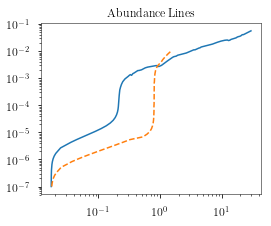

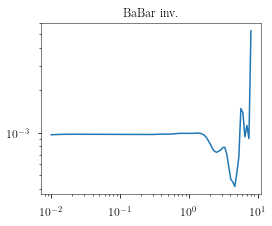

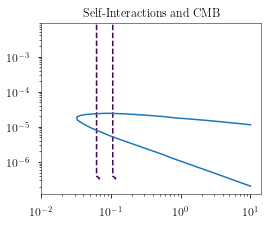

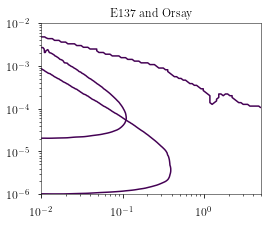

('Saving to ', './hps_2body_2016_reach.pdf')


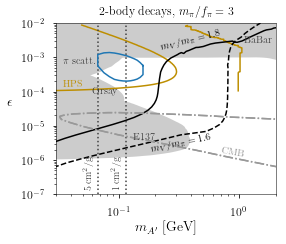

In [220]:
plt.rcParams.update(rc_params)
aD = 1e-2
rPi = 1/3.
mPiOverFpi = 3.
scan_file = "./limits/ft_reach_mpi_mrho_ma_1_1.8_3_ad_0.01_mpioverfpi_3_ldmx_theory_paper.dat"
cmb_decay_bound_file = './limits/cmb_decay_bound_Delta_0p05_mPiOverFpi_3_aD_1em2.dat'
abundance_contour_file1 = './abundance_cont/abun_cont_mPi_vs_eps_rV_1p8_aD_1m2_neutral_V_only_combined.dat'
abundance_contour_file2 = './abundance_cont/abun_cont_mPi_vs_eps_rV_1p6_aD_1m2_neutral_V_only.dat'
babar_bound_file = './limits/babar_lim_aD_1em2_mPiOverFpi_3_two_body.dat'
fout = 'testout.pdf'
params = {'aD': aD, 'rPi': rPi, 'mPiOverFpi': mPiOverFpi, 'fout':fout, \
          'scan_fname': scan_file, 'abundance_file1':abundance_contour_file1,'abundance_file2':abundance_contour_file2,\
          'babar_bound_fname': babar_bound_file, 'cmb_decay_bound_file':cmb_decay_bound_file, 'ylim':[1e-7,1e-2]}
print(params)
label_list = [
    [0.13, 3.9e-6, r'E137', excluded_label_color, 0],\
    [0.06, 0.84e-4, r'Orsay',excluded_label_color,0],\
    [0.034, 6e-4, r'$\pi$ scatt.', excluded_label_color,0],\
    [1.1,2.5e-3,r'BaBar', excluded_label_color,0],\
    [0.034,1.4e-4, r'HPS', hps_color, 1],\
    [0.22, 3.8e-3, r'$m_V/m_\pi = 1.8$',abun_color, 14],\
    [0.18, 3.6e-6, r'$m_V/m_\pi = 1.6$',abun_color, 12],
    [0.087, 7e-7, r'$1\,\mathrm{cm}^2/\mathrm{g}$',excluded_label_color, 90],\
    [0.051, 7e-7, r'$5\,\mathrm{cm}^2/\mathrm{g}$',excluded_label_color, 90],\
    [0.7, 1.6e-6, r'CMB',cmb_color, -10],\
]
#\,\mathrm{cm}^2/\mathrm{g}

params['label_list'] = label_list
#params['title'] = r'$V\rightarrow \bar f f$'
params['title'] = r'2-body decays, $m_\pi/f_\pi = 3$'
params['fout'] = ""#"graphics/mAp_vs_eps_two_body_mPiOverFpi_3_hps_review.pdf"

make_plots(params)